```{contents}
```

# XGBoost Classifier 

XGBoost Classifier is a **gradient boosting-based algorithm** optimized for **classification tasks** (binary or multiclass).
It is widely used because it is **fast, accurate, and regularized**.

---

## 1. Intuition

Think of XGBoost as a team of weak learners (decision trees) that **work together** to fix each other’s mistakes:

* Start with a simple prediction (e.g., log-odds of positive class).
* Fit a decision tree to the **residual errors** or **gradients of loss function**.
* Update predictions by adding the new tree with a learning rate (shrinkage).
* Repeat for many rounds until convergence or stopping criteria.

➡️ The model improves **sequentially**, focusing more on hard-to-classify samples.

---

## 2. Workflow of XGBClassifier

1. **Input data** → Features (X), labels (y).
2. **Initialize predictions** (log-odds of classes).
3. **Compute gradients & hessians** (1st and 2nd derivatives of the loss).
4. **Build a decision tree**:

   * Use gradients & hessians to decide splits.
   * Find the best split by maximizing **gain** (improvement in loss).
5. **Update predictions** with the tree’s output, scaled by `learning_rate`.
6. **Repeat** steps 3–5 until `n_estimators` is reached or early stopping triggers.
7. **Final prediction**: apply softmax/logistic function to convert scores → probabilities → class labels.

---

## 3. Objective Functions in Classification

XGBoost supports multiple loss functions:

* **Binary Classification**
  Logistic loss:

  $$
  L = -\sum_{i=1}^n \big[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \big]
  $$

  where $p_i = \sigma(\hat{y}_i)$, sigmoid converts score → probability.

* **Multiclass Classification**
  Softmax loss:

  $$
  L = -\sum_{i=1}^n \sum_{k=1}^K y_{ik} \log(p_{ik})
  $$

  where $p_{ik} = \frac{e^{\hat{y}_{ik}}}{\sum_j e^{\hat{y}_{ij}}}$.

---

## 4. Important Hyperparameters

* `n_estimators` → number of boosting rounds.
* `learning_rate` → step size shrinkage (avoids overfitting).
* `max_depth` → depth of trees (controls complexity).
* `subsample` → fraction of training samples per tree.
* `colsample_bytree` → fraction of features per tree.
* `reg_lambda`, `reg_alpha` → L2/L1 regularization.
* `objective` → `"binary:logistic"`, `"multi:softmax"`, `"multi:softprob"`.

---

## 5. Evaluation Metrics

* **Binary**: Accuracy, Precision, Recall, F1, AUC-ROC.
* **Multiclass**: Accuracy, Log-loss, Macro/Micro F1.

---

## 6. Advantages of XGBClassifier

* Very **fast and efficient** (parallel & GPU support).
* Handles **missing values** automatically.
* Supports **regularization** (avoids overfitting).
* Can handle **imbalanced datasets** via `scale_pos_weight`.
* Works with **large datasets** and high dimensions.

---

## 7. When to Use XGBClassifier

* Binary classification (spam vs not spam, fraud detection).
* Multiclass classification (digit recognition, disease type prediction).
* Tabular datasets where **boosting trees outperform deep learning**.



✅ Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87        37
           1       0.98      0.84      0.91        63

    accuracy                           0.89       100
   macro avg       0.88      0.91      0.89       100
weighted avg       0.91      0.89      0.89       100



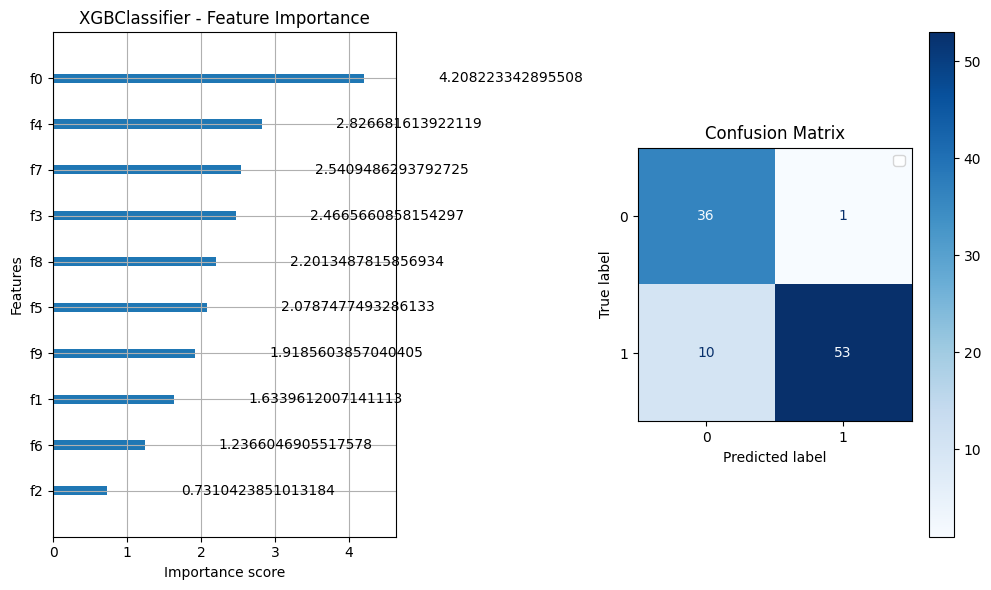

In [8]:
# ------------------------------
# XGBClassifier Demonstration (Fixed)
# ------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
import warnings

warnings.filterwarnings("ignore")

# 1. Generate synthetic classification dataset
X, y = make_classification(
    n_samples=500, n_features=10, n_informative=6, n_redundant=2,
    n_classes=2, random_state=42
)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Train XGBClassifier
model = XGBClassifier(
    n_estimators=200,      # number of boosting rounds
    learning_rate=0.1,     # shrinkage
    max_depth=3,           # depth of trees
    subsample=0.8,         # row sampling
    colsample_bytree=0.8,  # feature sampling
    reg_lambda=1,          # L2 regularization
    use_label_encoder=False,  # suppress deprecation warning
    eval_metric="logloss",    # specify metric to avoid warnings
    random_state=42
)

model.fit(X_train, y_train)

# 3. Predictions
y_pred = model.predict(X_test)

# 4. Evaluate performance
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Feature importance and confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Feature importance
plot_importance(model, importance_type="gain", ax=axes[0])
axes[0].set_title("XGBClassifier - Feature Importance")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix")
plt.legend()
plt.tight_layout()
plt.show()
